<IPython.core.display.Javascript object>


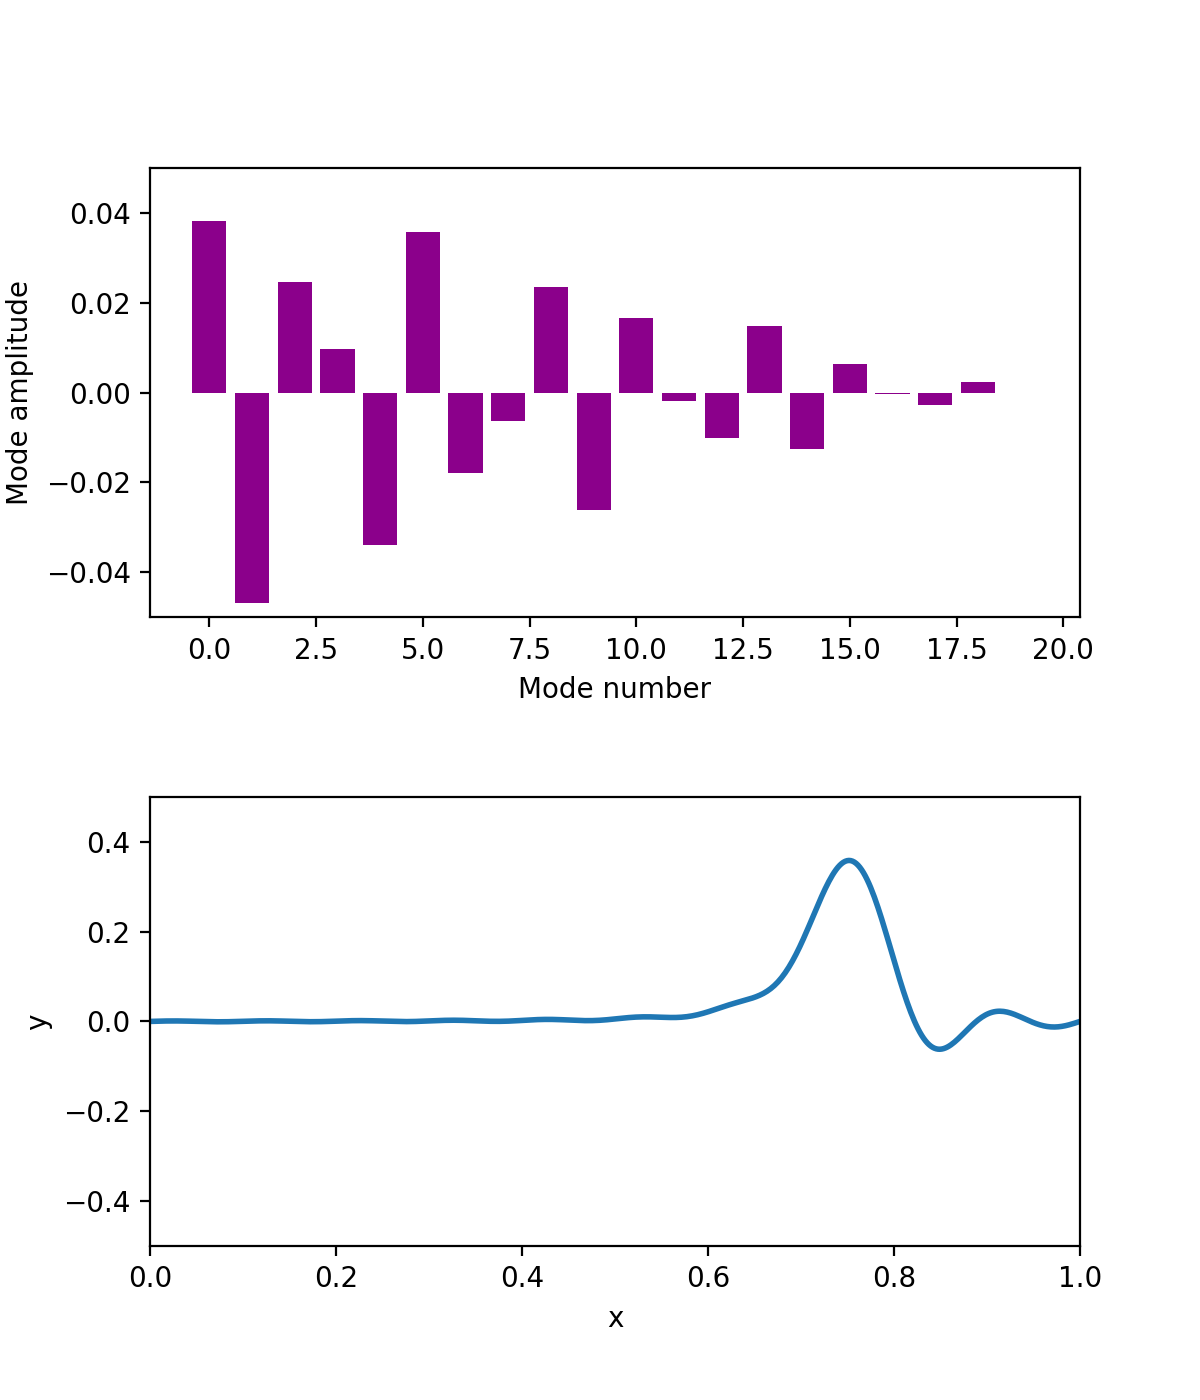

In [3]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation

fig, (axl, axr) = plt.subplots(
    nrows=2,
    sharey=False,
    figsize=(6, 7),
    gridspec_kw=dict(height_ratios=[2, 2], hspace=0.4),
)

# ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 0.5))
axr.set_xlim(0, 1)
axr.set_ylim(-0.5, 0.5)
axl.set_ylim(-1., 1.)
# axl.set_xticks([0, 5, 10, 15])
axl.set_xlabel("Mode number")
axr.set_ylabel("y")
axr.set_xlabel("x")
# axr.yaxis.tick_right()
axl.set_ylabel("Mode amplitude")


M = 20
axl.set_ylim(-1/M, 1/M)
line, = axr.plot([], [], lw=2)
bar = axl.bar(np.arange(M), np.zeros(M), color=["darkmagenta"])

mode_amplitudes = np.ones((M, 2)) * np.linspace(1., 0., M)[:, None] / M
    
N = 512
NT = 512
T = 2
dt = T / NT

xs = np.linspace(0, 1, N)

def animate(i):
    t = dt * i
    vals = np.zeros(N)
    amps = []
    for n, (a, p) in enumerate(mode_amplitudes):
        n = n + 1
        omega = n * np.pi
        amp = a * np.sin((t - p) * omega)
        amps.append(amp)
        st = 2**0.5 * amp * np.sin(xs * n * np.pi) 
        vals += st
#     if i == 0:  
#         global saved_amps
#         saved_amps = np.array(amps)
#     else:
#         if np.isclose(np.array(saved_amps), np.array(amps), atol=1e-4).all():
#             print(f"REPEAT {i}")
#     bar.set_data(amps)
    for rect, h in zip(bar, amps):
          rect.set_height(h)
        
    line.set_data(xs, vals)
    return line, bar


anim = animation.FuncAnimation(fig, animate, frames=NT, interval=10, blit=True)
# writervideo = animation.FFMpegWriter(fps=30) 
# anim.save("wave_eq.mp4", writer=writervideo)

# plt.show()